In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [14]:
iris_df=pd.read_csv("IRIS (1).csv")
iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [15]:
print("Shape of the data frame: ",iris_df.shape)
print("Total null values: ",iris_df.isna().sum().sum())
print("Duplicate values: ",iris_df.duplicated().sum() )

Shape of the data frame:  (150, 5)
Total null values:  0
Duplicate values:  3


In [16]:
iris_df.drop_duplicates(inplace=True)
print("Shape of the data frame: ",iris_df.shape)
print("\n")
print("Species categories with its count \n",iris_df["species"].value_counts())

Shape of the data frame:  (147, 5)


Species categories with its count 
 species
Iris-versicolor    50
Iris-virginica     49
Iris-setosa        48
Name: count, dtype: int64


In [17]:
iris_df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,147.000000,147.000000,147.000000,147.000000
mean,5.856463,3.055782,3.780272,1.208844
std,0.829100,0.437009,1.759111,0.757874
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.400000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


<Axes: >

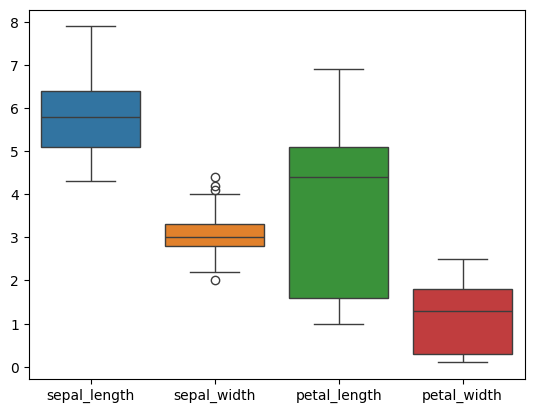

In [18]:
#iris_df.plot(kind='box')
#plt.show()
sns.boxplot(data=iris_df)

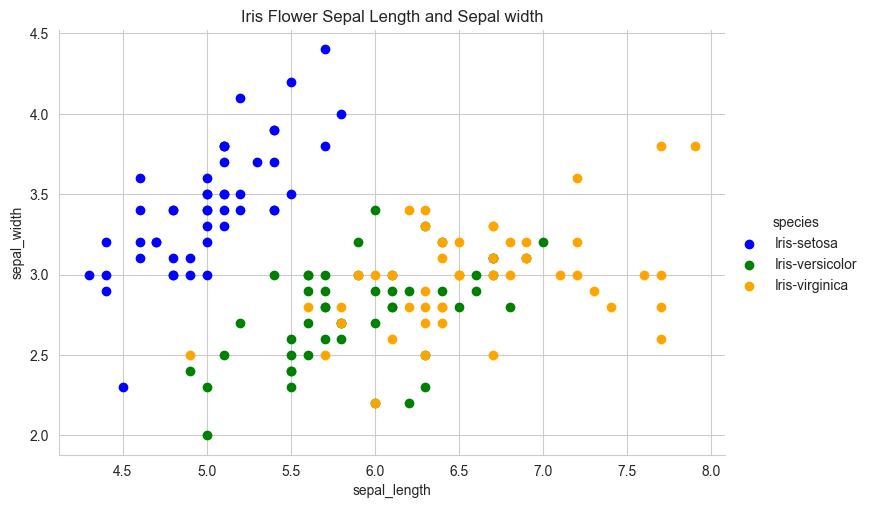

In [23]:
# Define a custom palette with keys matching the values in the 'species' column
custom_palette = {'Iris-setosa': 'blue', 'Iris-versicolor': 'green', 'Iris-virginica': 'orange'}

sns.set_style('whitegrid')
sns.FacetGrid(iris_df,hue = 'species',palette=custom_palette, height=5, aspect=1.5) \
    .map(plt.scatter,'sepal_length','sepal_width') \
    .add_legend();
plt.title("Iris Flower Sepal Length and Sepal width")
plt.show();   

C:\Users\Reacon 37\.conda\envs\ML_Opps\Lib\site-packages\seaborn\axisgrid.py:2100: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


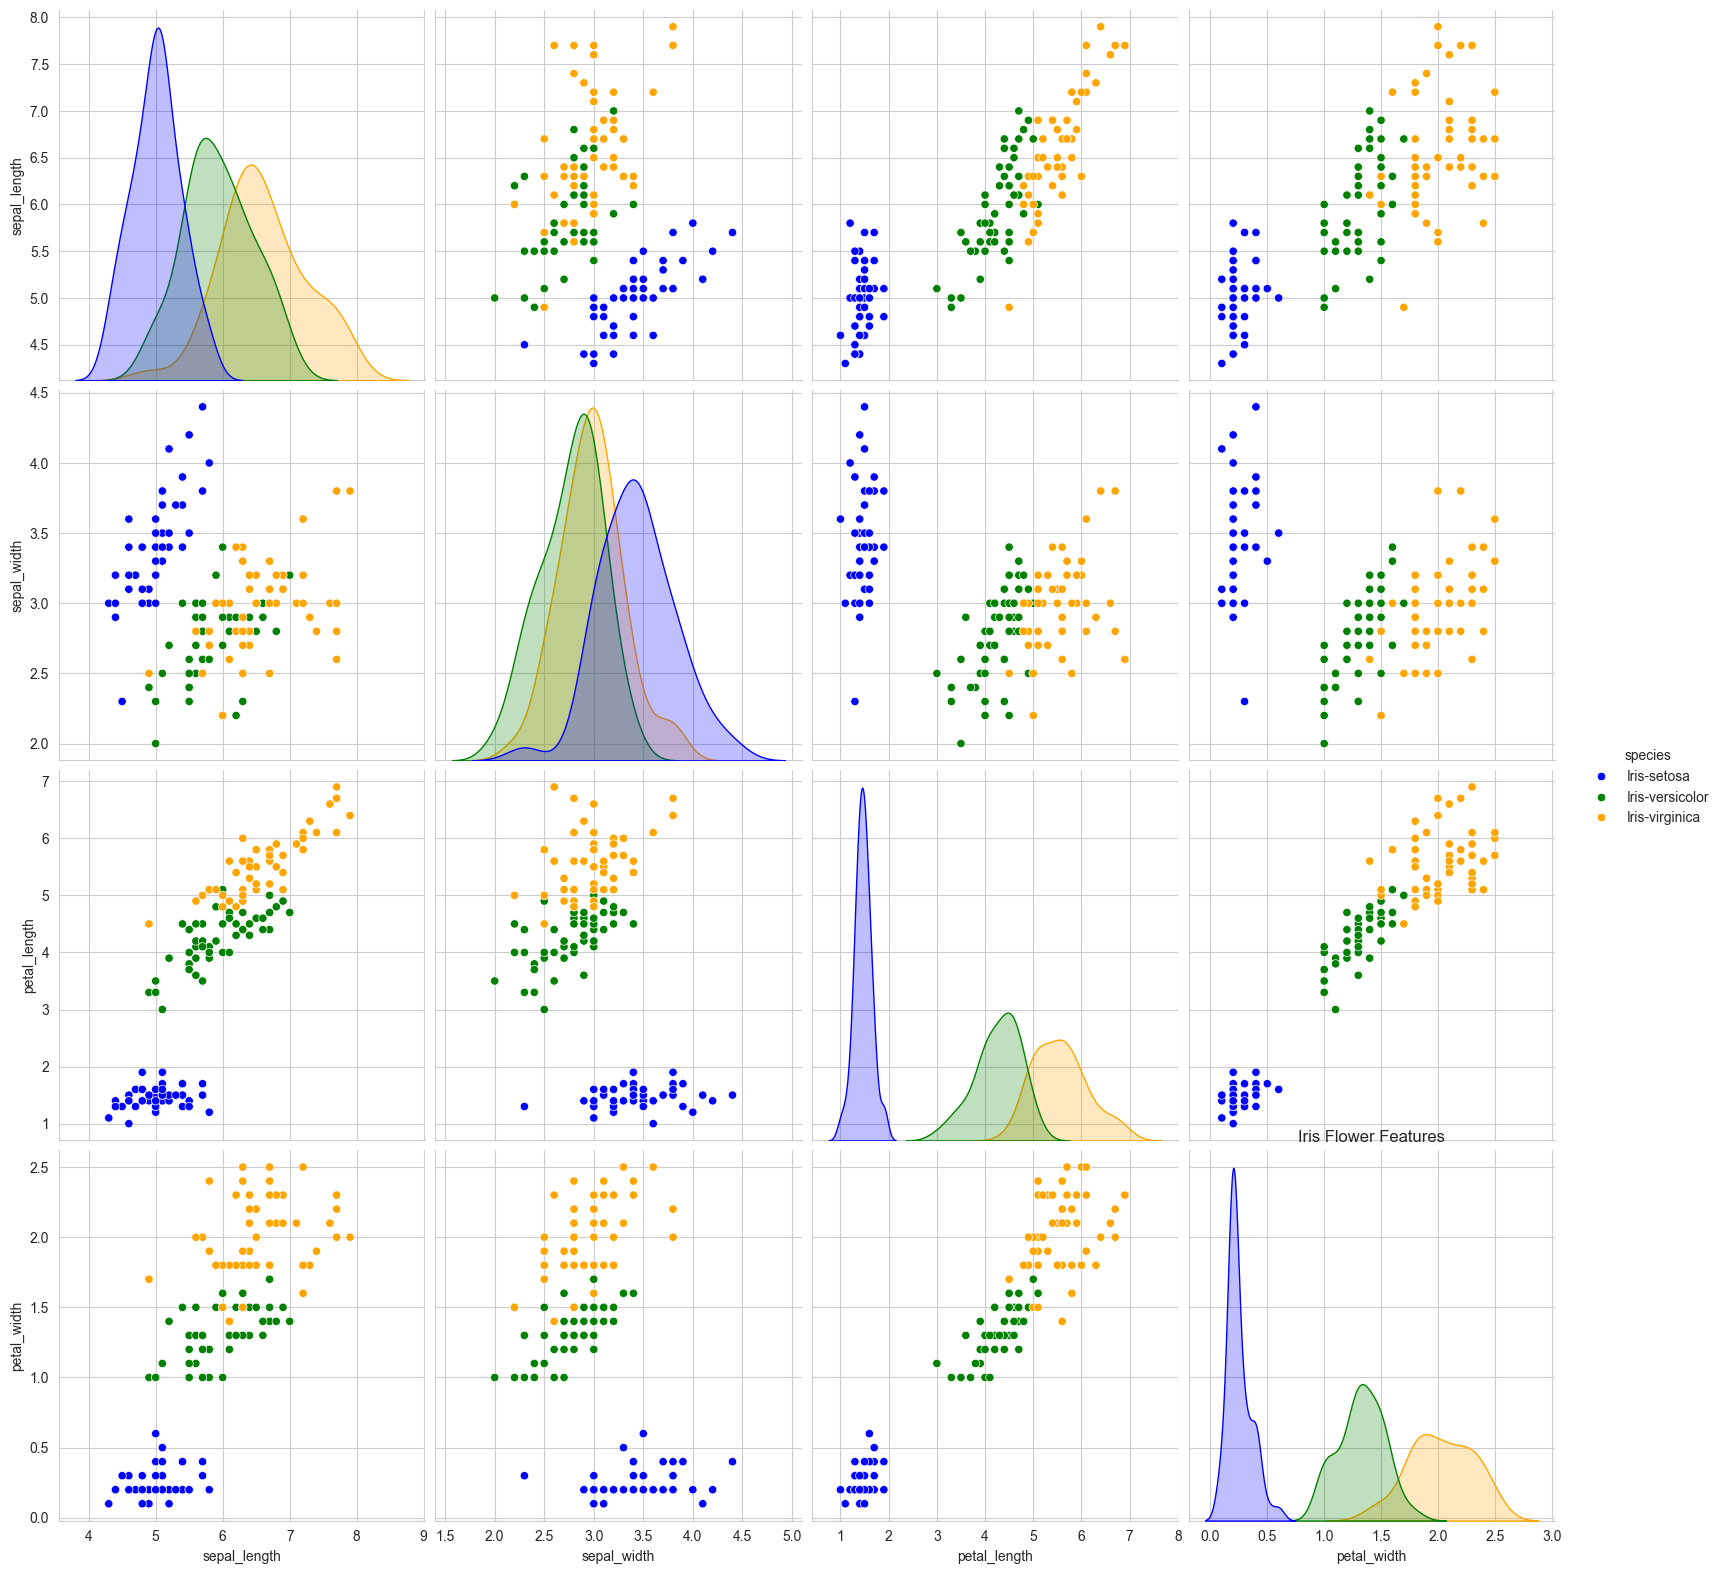

In [24]:
plt.close();
sns.set_style('whitegrid')
sns.pairplot(iris_df,hue='species',palette=custom_palette,size=4)
plt.title("Iris Flower Features")
plt.show();

<Figure size 1200x600 with 0 Axes>

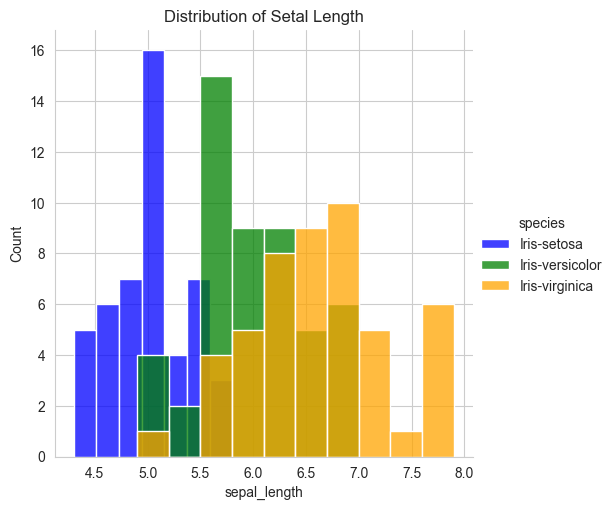

In [25]:
plt.figure(figsize=(12,6))
# Create FacetGrid with Seaborn
sns.FacetGrid(iris_df,hue='species',palette=custom_palette, height=5) \
    .map(sns.histplot, 'sepal_length') \
    .add_legend();
plt.title("Distribution of Setal Length")
plt.show();

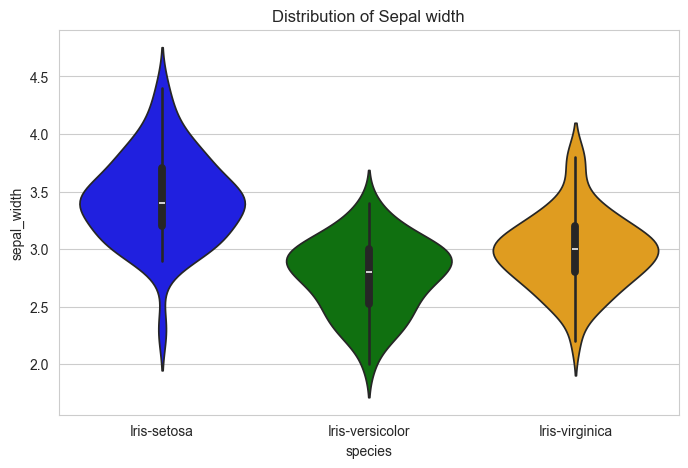

In [26]:
#Violin Plots
plt.figure(figsize=(8, 5))
sns.violinplot(x='species',y='sepal_width',palette=custom_palette,data=iris_df,hue='species')
plt.title("Distribution of Sepal width")
plt.show();

C:\Users\Reacon 37\.conda\envs\ML_Opps\Lib\site-packages\seaborn\axisgrid.py:854: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
C:\Users\Reacon 37\.conda\envs\ML_Opps\Lib\site-packages\seaborn\axisgrid.py:854: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
C:

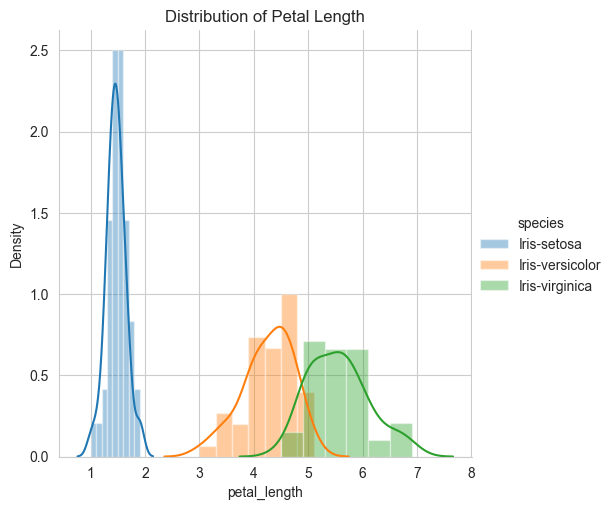

In [27]:
#Distplot
# Create FacetGrid with Seaborn
sns.FacetGrid(iris_df,hue='species', height=5) \
    .map(sns.distplot, 'petal_length') \
    .add_legend();
plt.title("Distribution of Petal Length")
plt.show();

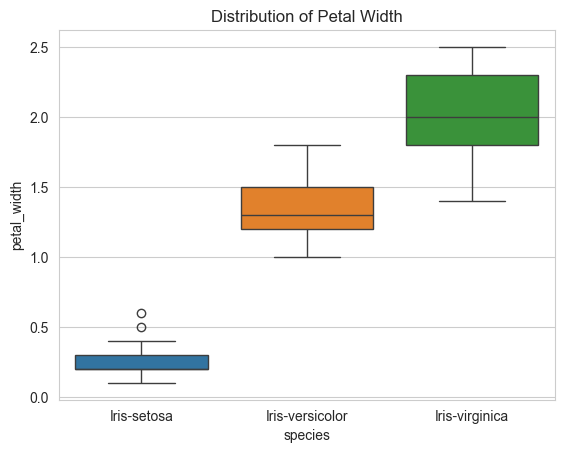

In [28]:
#Boxplot
sns.boxplot(x='species',y='petal_width',data=iris_df,hue='species')
plt.title("Distribution of Petal Width")
plt.show();

In [29]:
labels = {'setosa' : 0,'versicolor' : 1,'virginica' : 2}
iris_df['species'] = iris_df['species'].replace(labels)
iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [30]:
X = iris_df.drop(columns=['species']) #features
y = iris_df['species'] #target variable

In [31]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,stratify = y,test_size=0.3,random_state=2)

# The shape of traing and Testing data
print("Shape of X_train : ",X_train.shape)
print("Shape of X_test : ",X_test.shape)
print("Shape of y_train : ",y_train.shape)
print("Shape of y_test : ",y_test.shape)


Shape of X_train :  (102, 4)
Shape of X_test :  (45, 4)
Shape of y_train :  (102,)
Shape of y_test :  (45,)


In [32]:
# Select the model
from sklearn.linear_model import LogisticRegression 
logit = LogisticRegression(max_iter=1000)

# Train the model with Training data
logit.fit(X_train,y_train)

# Predictions on Testing Data
y_pred = logit.predict(X_test)

In [33]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

# Classification Report 
cr = classification_report(y_pred,y_test)
print(cr)


a_s = accuracy_score(y_pred,y_test)
print("Accuracy score of Logistice Regression : %.2f"%((a_s)*100),'%')



                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        15
Iris-versicolor       1.00      0.88      0.94        17
 Iris-virginica       0.87      1.00      0.93        13

       accuracy                           0.96        45
      macro avg       0.96      0.96      0.96        45
   weighted avg       0.96      0.96      0.96        45

Accuracy score of Logistice Regression : 95.56 %


In [34]:
import pickle

# Assuming logit is your trained Logistic Regression model
with open('IRIS (1).pkl', 'wb') as model_file:
    pickle.dump(logit, model_file)

In [ ]:
#import pickle

# Load the saved model
#with open('logistic_regression_model.pkl', 'rb') as model_file:
#    loaded_model = pickle.load(model_file)

# Use the loaded model for predictions
#prediction = loaded_model.predict(new_data)
